#                               Customer Churn Prediction Model for E-commerce 🛒🔍 

Objective: Predict which customers are likely to stop using the e-commerce platform.

Data: Transaction history, website activity, demographics, interactions, and marketing engagement.

Development: Preprocess data, engineer features, select and train machine learning models.

Deployment: Integrate model into operational systems for real-time predictions and interventions.

Benefits: Improve customer retention, enhance personalized experience, optimize marketing spend, gain competitive advantage. 📈🛍️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore')

In [2]:
start_all=time.time()
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [3]:
df.shape

(5630, 20)

In [4]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [7]:
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [8]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [9]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )


In [10]:
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile             

In [11]:
df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [12]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

In [13]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
0    4682
1     948
Name: Churn, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1


In [14]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [15]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [16]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [17]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [18]:
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [19]:
df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

In [20]:
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

In [21]:
df.duplicated().sum()

0

In [22]:
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


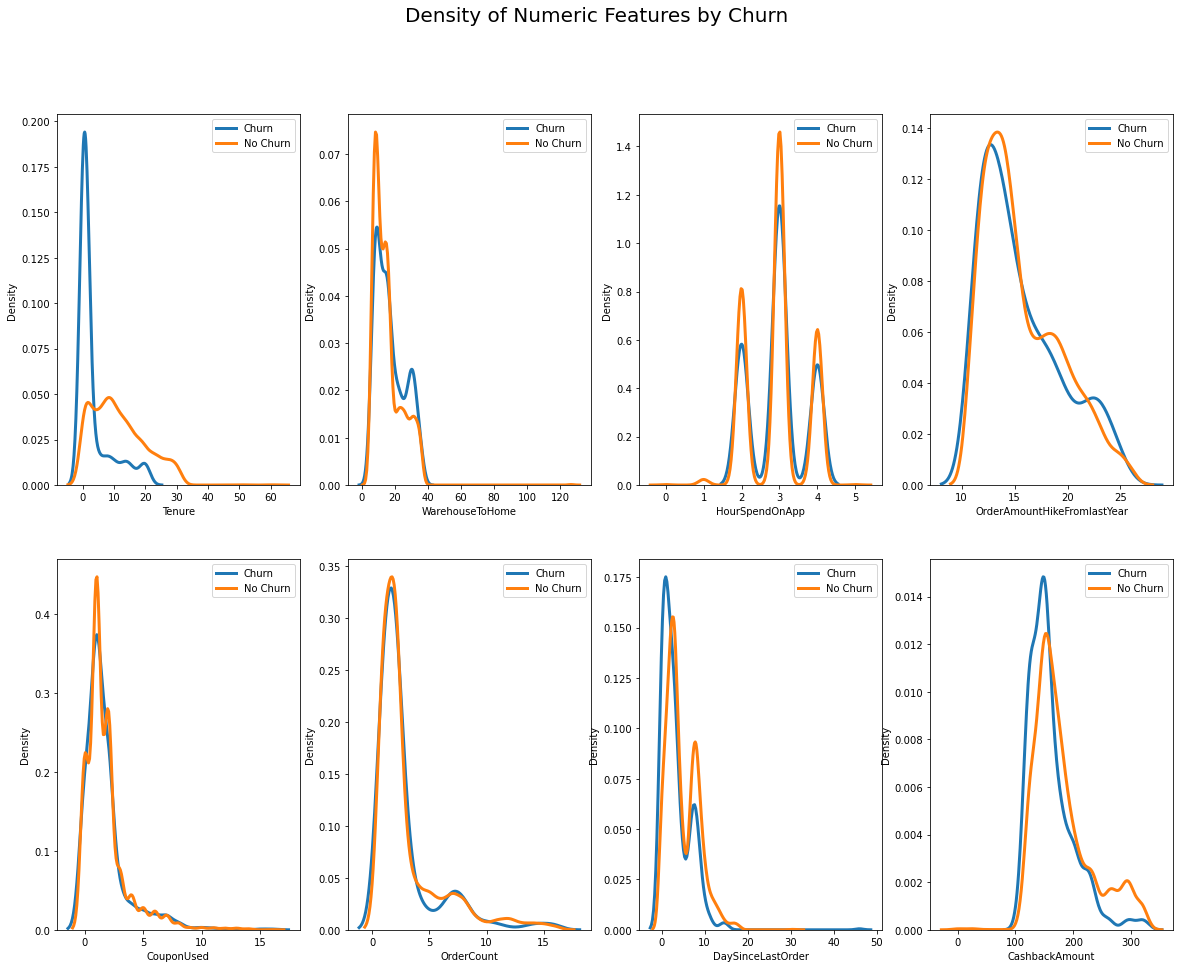

In [24]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

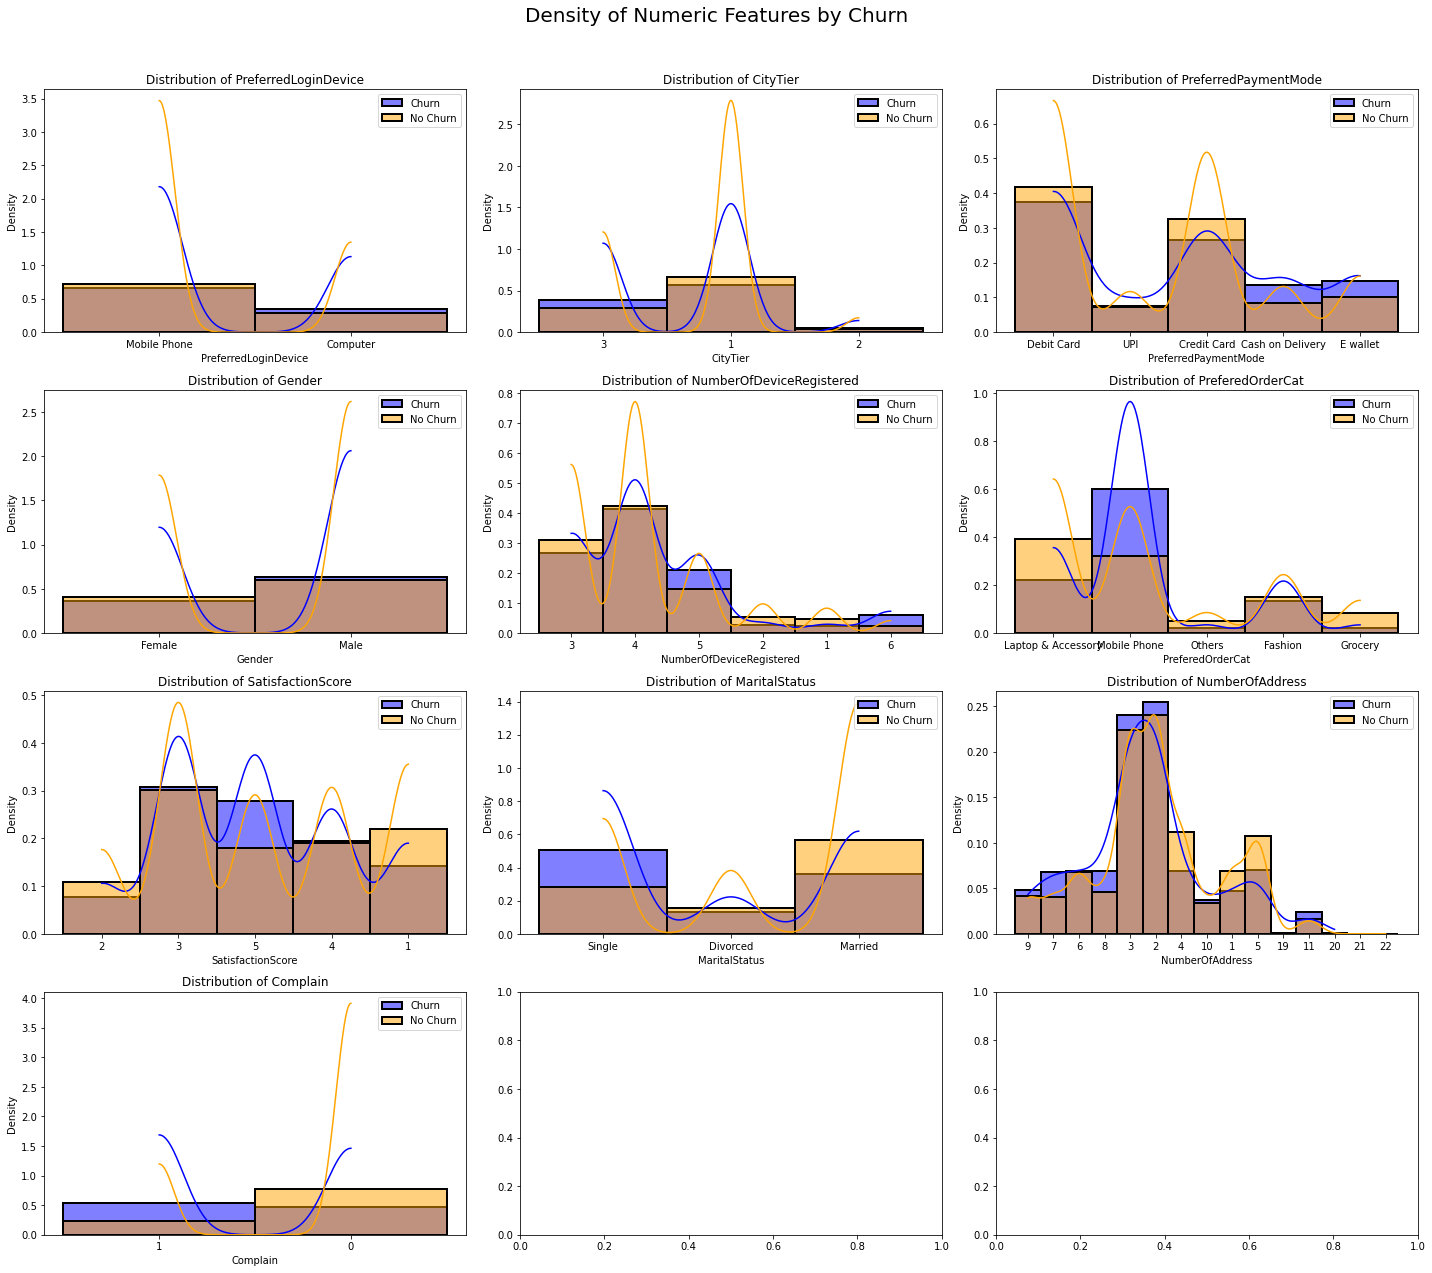

In [25]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4, 3, figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx, c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth=2, color='blue', label='Churn', ax=ax[idx], kde=True, stat="density")
    sns.histplot(df_nc[c], linewidth=2, color='orange', label='No Churn', ax=ax[idx], kde=True, stat="density")
    
    ax[idx].set_title(f'Distribution of {c}')
    ax[idx].legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

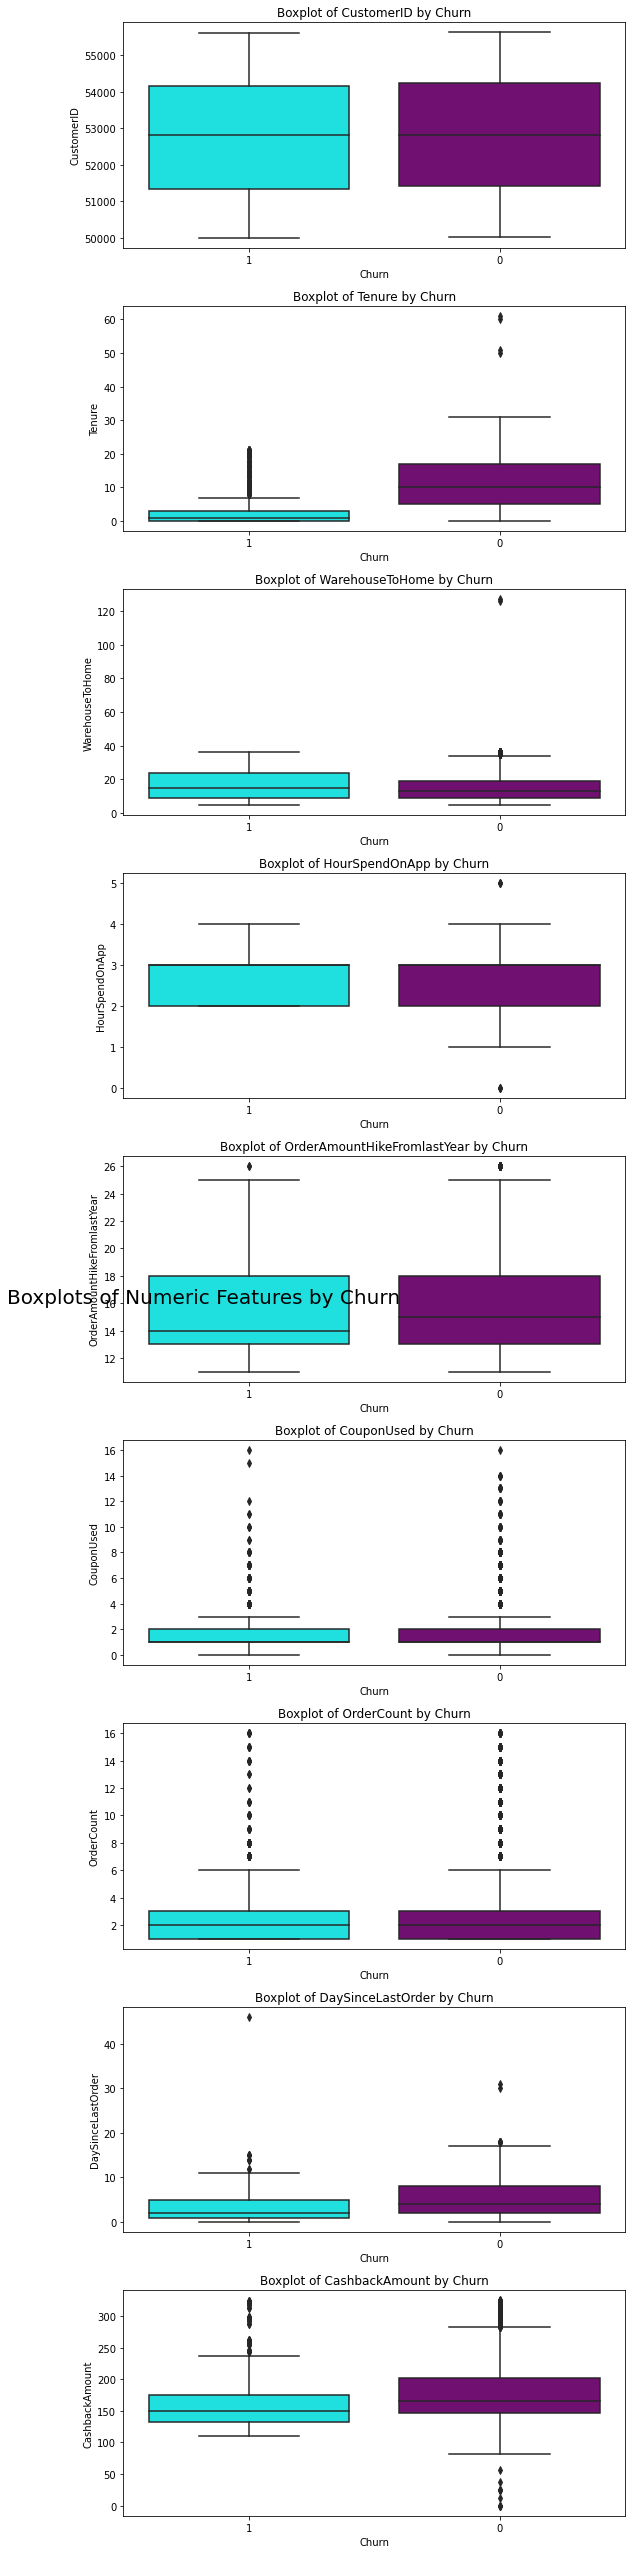

In [26]:
num_cols = df2.select_dtypes(include='number').columns.tolist()

fig, ax = plt.subplots(len(num_cols), 1, figsize=(4, len(num_cols) * 2))
fig.suptitle('Boxplots of Numeric Features by Churn', fontsize=20)
if len(num_cols) == 1:
    ax = [ax]  
for idx, col in enumerate(num_cols):
    sns.boxplot(data=df2, x='Churn', y=col, ax=ax[idx], palette=["cyan", "purple"])
    ax[idx].set_title(f'Boxplot of {col} by Churn')

plt.tight_layout(rect=[0, 0, 2, 2])
plt.show()


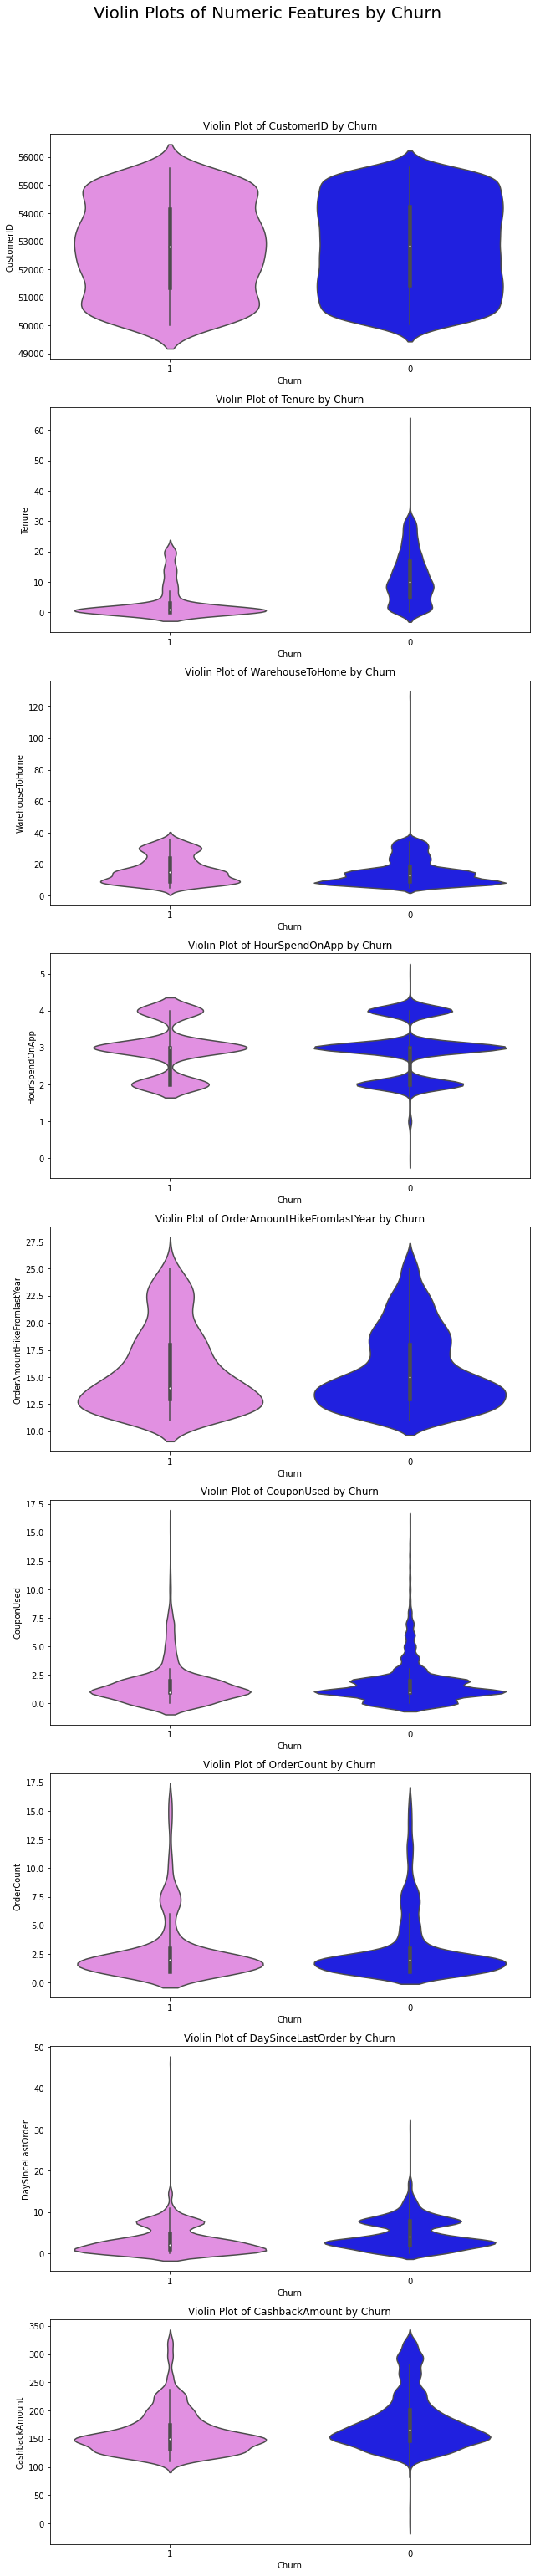

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(len(num_cols), 1, figsize=(9, len(num_cols) * 5))
fig.suptitle('Violin Plots of Numeric Features by Churn', fontsize=20)

if len(num_cols) == 1:
    ax = [ax]  

for idx, col in enumerate(num_cols):
    sns.violinplot(data=df2, x='Churn', y=col, ax=ax[idx], palette=["violet", "blue"])
    ax[idx].set_title(f'Violin Plot of {col} by Churn')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


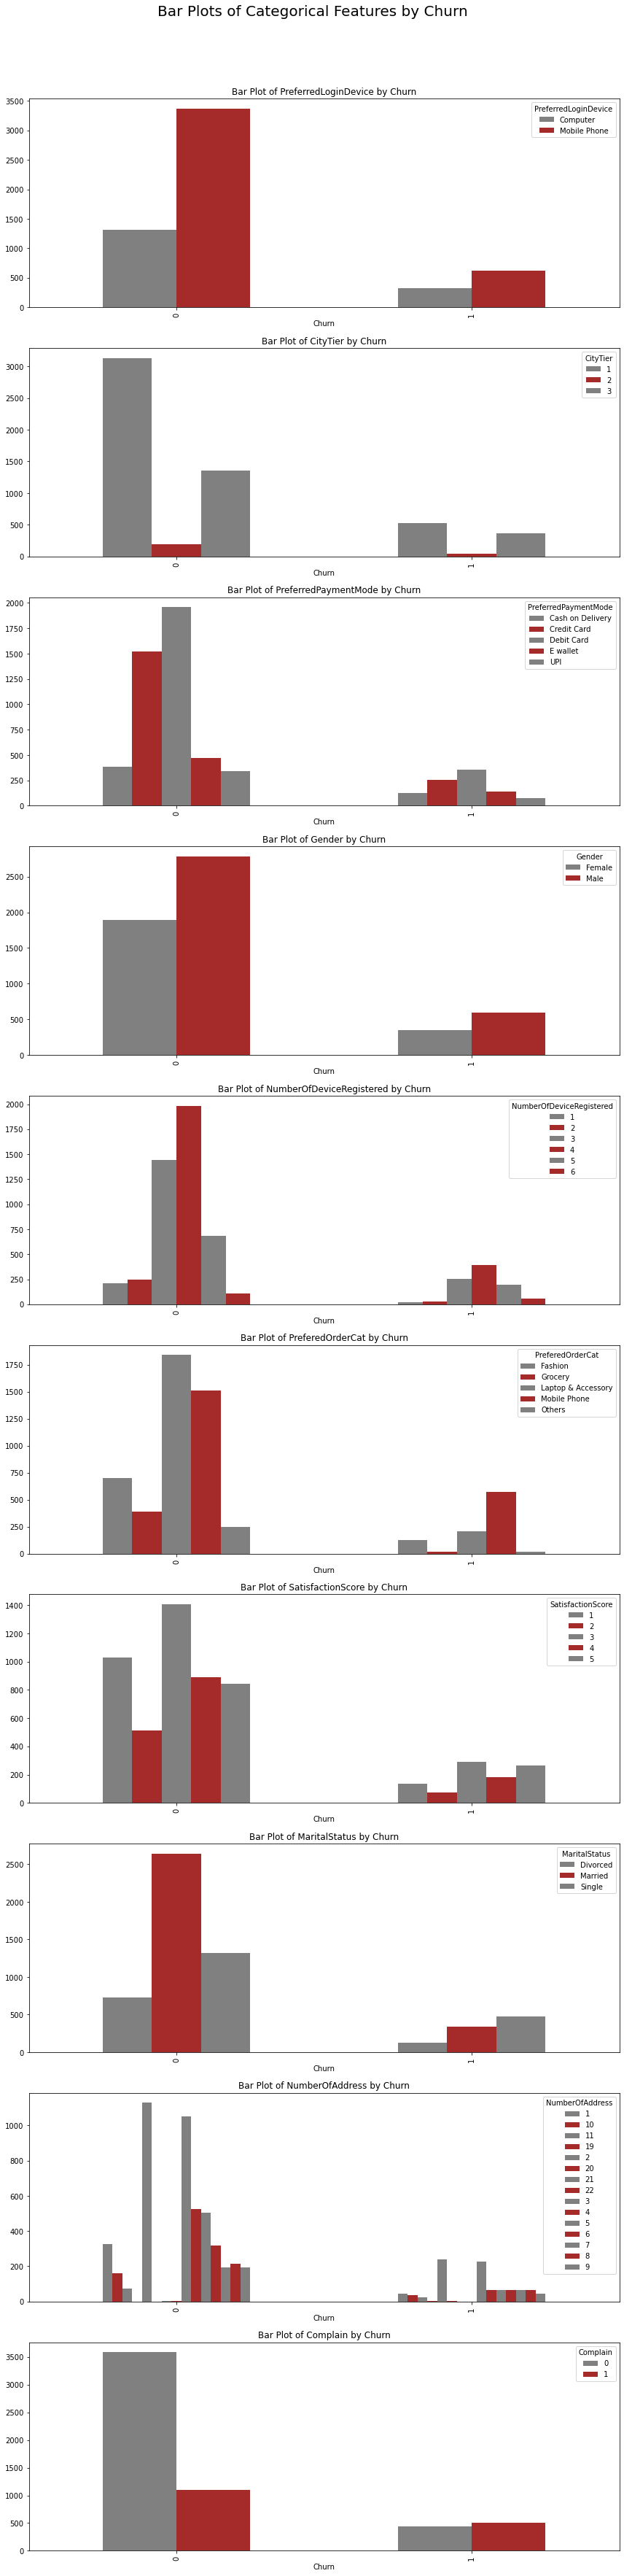

In [28]:
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(12, len(cat_cols) * 5))
fig.suptitle('Bar Plots of Categorical Features by Churn', fontsize=20)
if len(cat_cols) == 1:
    ax = [ax] 
for idx, col in enumerate(cat_cols):
    churn_counts = df2.groupby(['Churn', col]).size().unstack().fillna(0)
    churn_counts.plot(kind='bar', ax=ax[idx], color=["grey", "brown"])
    ax[idx].set_title(f'Bar Plot of {col} by Churn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

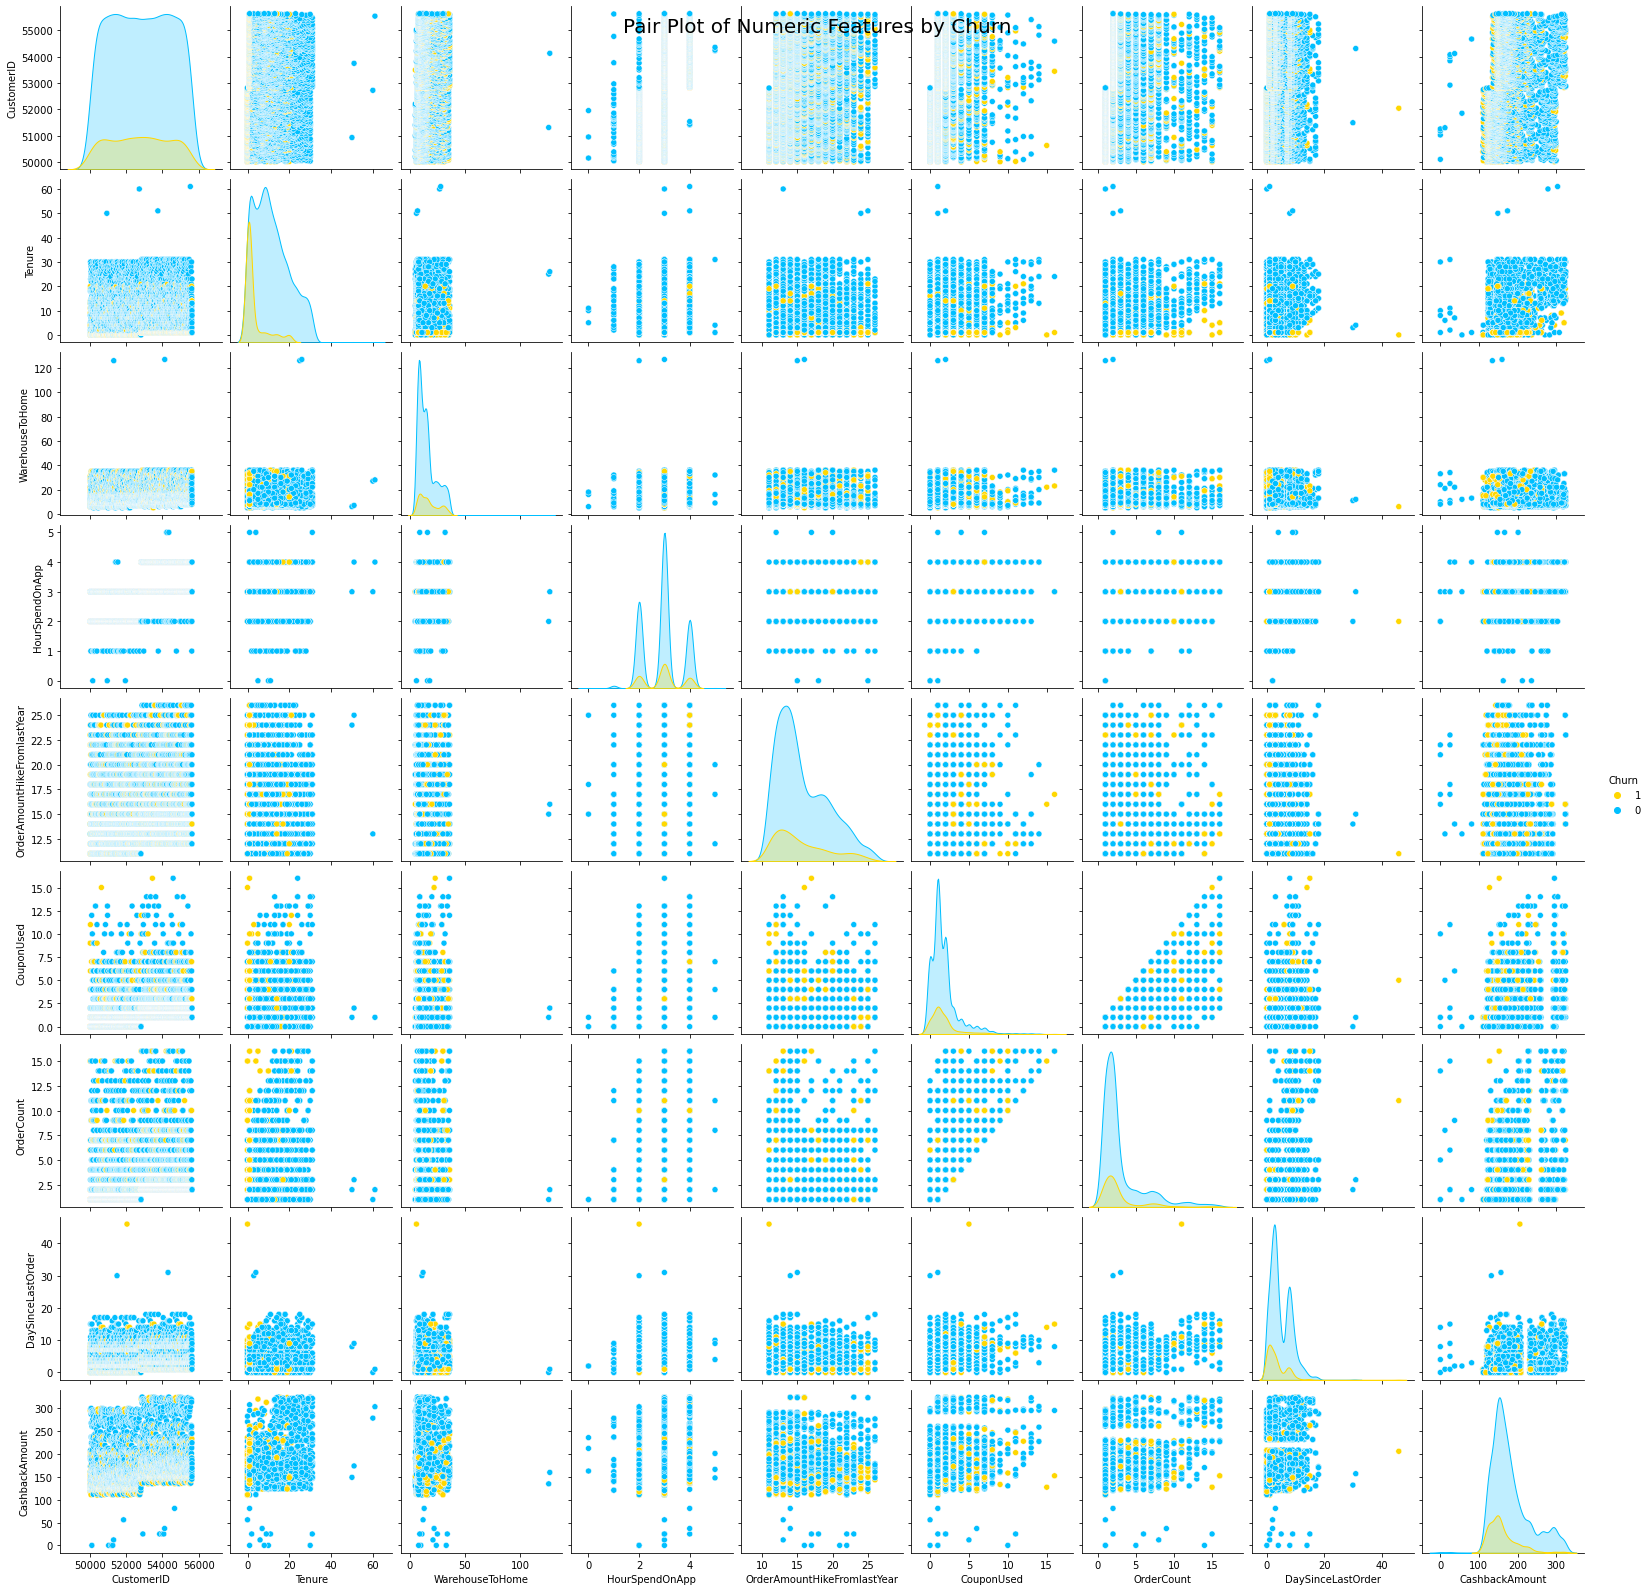

In [29]:
sns.pairplot(df2, hue='Churn', palette={"0": "deepskyblue", "1": "gold"})
plt.suptitle('Pair Plot of Numeric Features by Churn', fontsize=20)
plt.show()

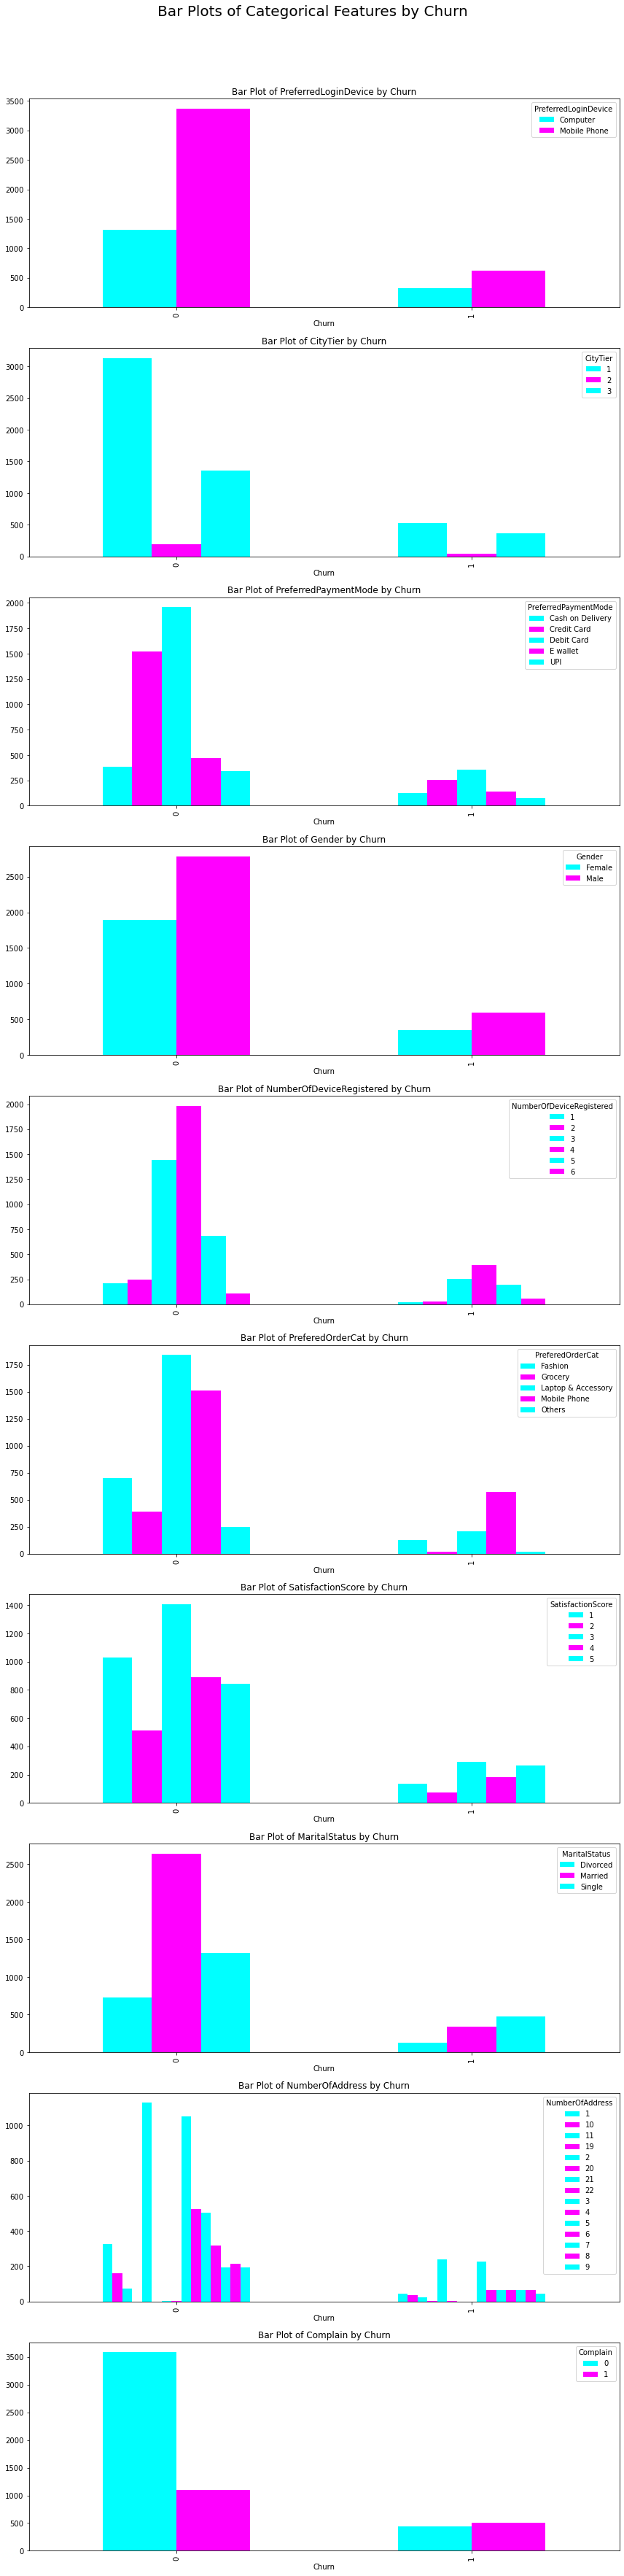

In [30]:
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(12, len(cat_cols) * 5))
fig.suptitle('Bar Plots of Categorical Features by Churn', fontsize=20)
if len(cat_cols) == 1:
    ax = [ax]  

for idx, col in enumerate(cat_cols):
    churn_counts = df2.groupby(['Churn', col]).size().unstack().fillna(0)
    churn_counts.plot(kind='bar', ax=ax[idx], color=["cyan", "magenta"])
    ax[idx].set_title(f'Bar Plot of {col} by Churn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


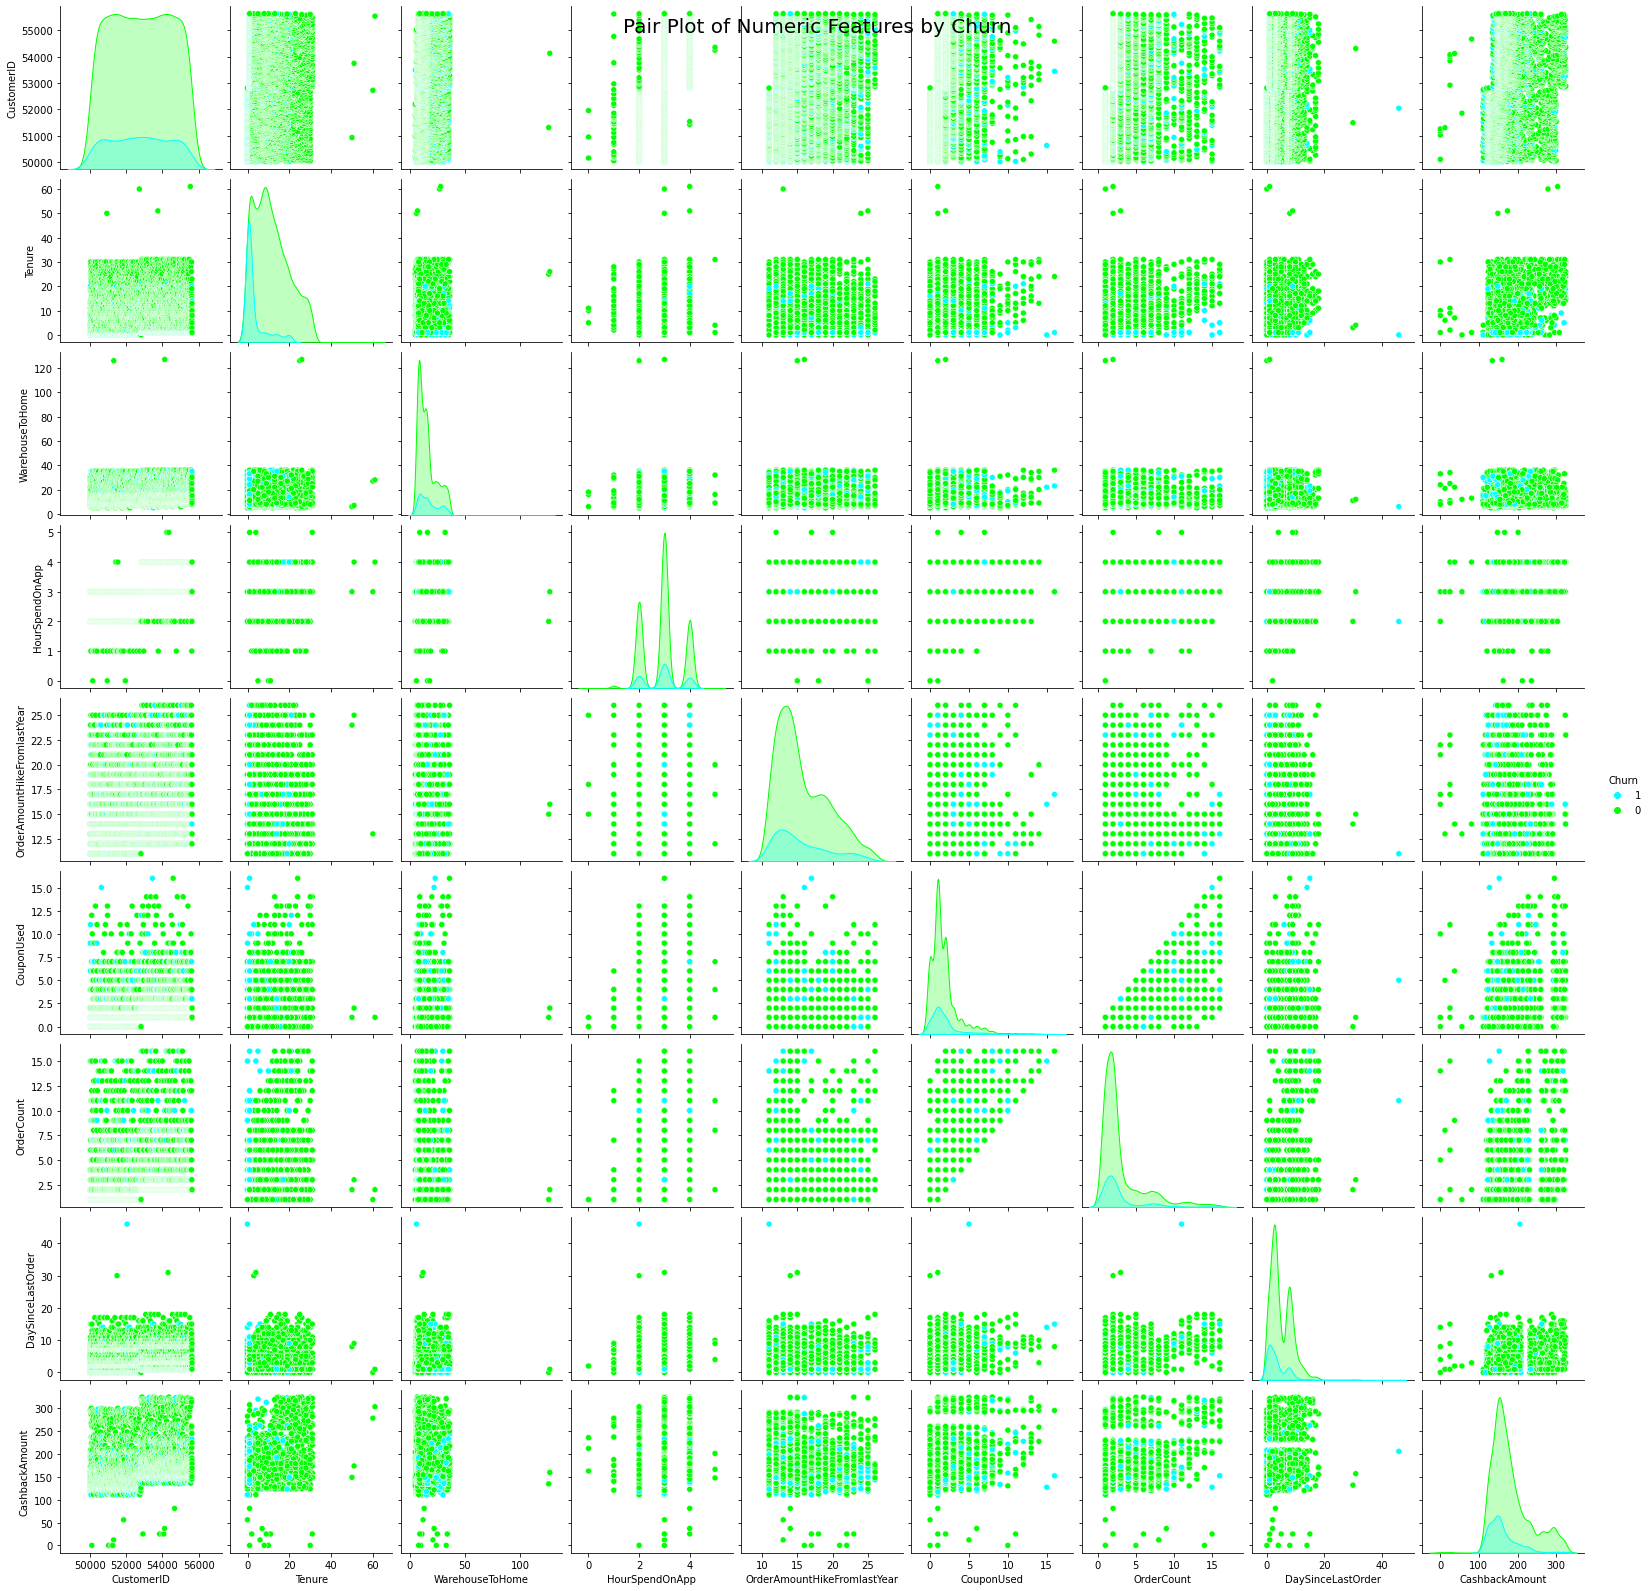

In [31]:
sns.pairplot(df2, hue='Churn', palette={"0": "lime", "1": "cyan"})
plt.suptitle('Pair Plot of Numeric Features by Churn', fontsize=20)
plt.show()

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df['Tenure'] = imputer.fit_transform(df[['Tenure']])
df['WarehouseToHome'] = imputer.fit_transform(df[['WarehouseToHome']]) 
df['HourSpendOnApp'] = imputer.fit_transform(df[['HourSpendOnApp']])
df['OrderAmountHikeFromlastYear'] = imputer.fit_transform(df[['OrderAmountHikeFromlastYear']])
df['CouponUsed'] = imputer.fit_transform(df[['CouponUsed']])
df['OrderCount'] = imputer.fit_transform(df[['OrderCount']])  
df['DaySinceLastOrder'] = imputer.fit_transform(df[['DaySinceLastOrder']])

In [33]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [34]:
df.shape

(5630, 19)

In [35]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)


Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
****************************************
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
****************************************
Male      3384
Female    2246
Name: Gender, dtype: int64
****************************************
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
****************************************
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
****************************************


In [36]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [37]:
le = LabelEncoder()

In [38]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     1.0                     1         1              8.0   
2      1     1.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

In [39]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                     1                     2       0                 2   
1                     1                     4       1                 3   
2                     1                     2       1                 3   
3                     1                     2       1                 2   

   MaritalStatus  
0              2  
1              2  
2              2  
3              2

In [40]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

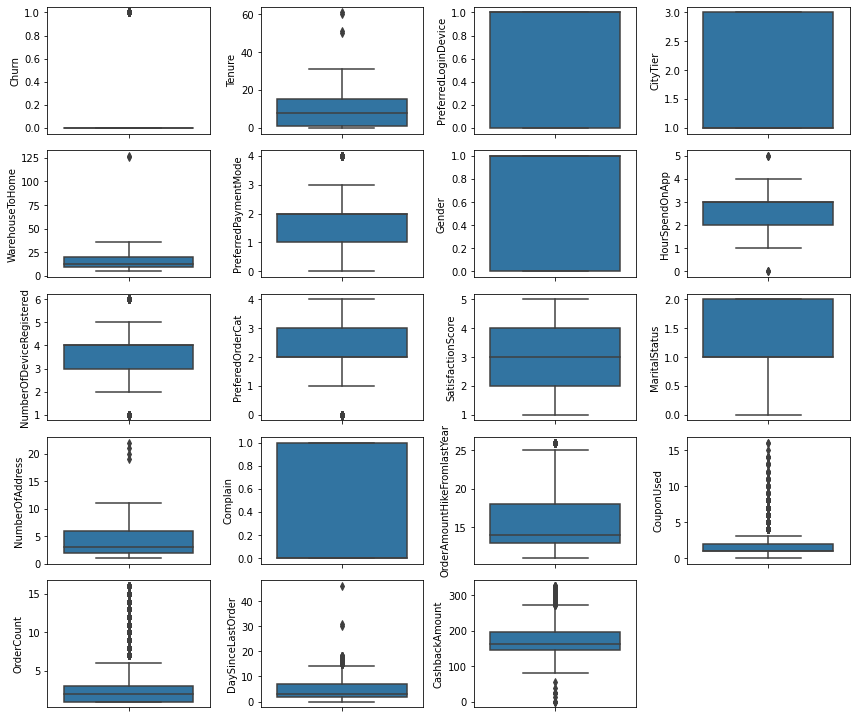

In [41]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [42]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [43]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [44]:
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     1.0                     1         1              8.0   
2      1     1.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

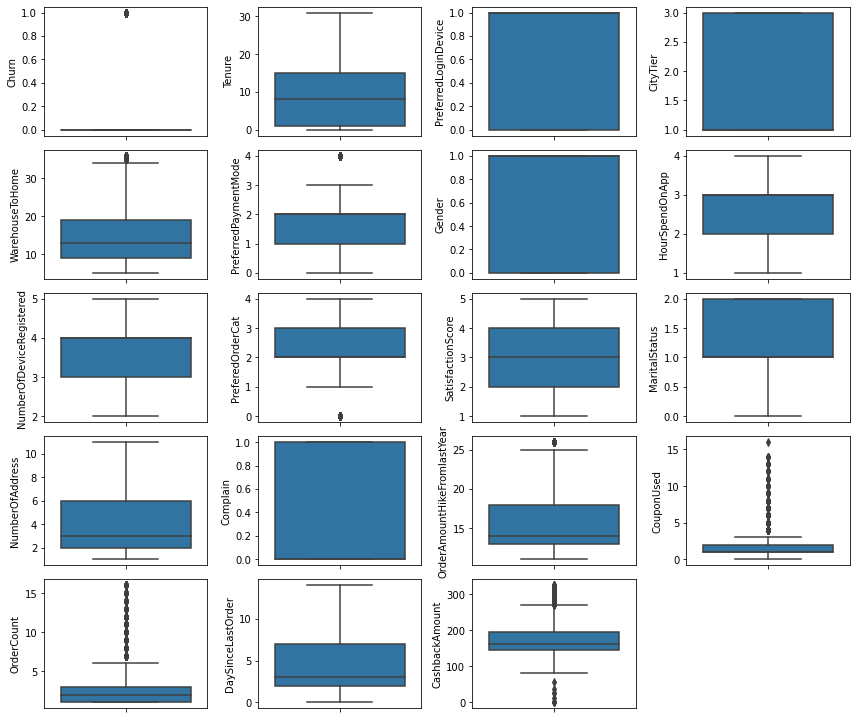

In [45]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [46]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                        1.000000 -0.344897             -0.040957   
Tenure                      -0.344897  1.000000              0.036622   
PreferredLoginDevice        -0.040957  0.036622              1.000000   
CityTier                     0.069710 -0.053528              0.010526   
WarehouseToHome              0.054803 -0.007071             -0.015713   
PreferredPaymentMode        -0.004939 -0.002814              0.010353   
Gender                       0.038218 -0.058103             -0.012763   
HourSpendOnApp               0.001628  0.021265              0.020561   
NumberOfDeviceRegistered     0.079158  0.004917             -0.005138   
PreferedOrderCat             0.105073 -0.216527              0.004910   
SatisfactionScore            0.108536 -0.019479              0.037431   
MaritalStatus                0.132019 -0.110577             -0.020046   
NumberOfAddress              0.033847  0.266441              0.033814   
Complain                     0.252183 -0.021059              0.005691   
OrderAmountHikeFromlastYear -0.001410 -0.014758             -0.007158   
CouponUsed                  -0.010879  0.133969             -0.018468   
OrderCount                  -0.031473  0.191134             -0.020105   
DaySinceLastOrder           -0.170018  0.198032             -0.026910   
CashbackAmount              -0.164738  0.507220              0.043034   

                             CityTier  WarehouseToHome  PreferredPaymentMode  \
Churn                        0.069710         0.054803             -0.004939   
Tenure                      -0.053528        -0.007071             -0.002814   
PreferredLoginDevice         0.010526        -0.015713              0.010353   
CityTier                     1.000000         0.014695              0.251772   
WarehouseToHome              0.014695         1.000000              0.008159   
PreferredPaymentMode         0.251772         0.008159              1.000000   
Gender                      -0.022697        -0.015909              0.019976   
HourSpendOnApp              -0.010884         0.082160             -0.007826   
NumberOfDeviceRegistered     0.007364         0.029087              0.013166   
PreferedOrderCat            -0.164116        -0.114390             -0.030990   
SatisfactionScore           -0.009822         0.013764             -0.018161   
MaritalStatus                0.002323        -0.028205             -0.024029   
NumberOfAddress             -0.033113         0.001246              0.003638   
Complain                     0.006177         0.022032              0.028254   
OrderAmountHikeFromlastYear -0.023635         0.041931             -0.000920   
CouponUsed                   0.019766         0.016450             -0.009413   
OrderCount                   0.037717         0.009916             -0.035885   
DaySinceLastOrder            0.011836         0.042377             -0.015452   
CashbackAmount               0.045271         0.036412              0.034968   

                               Gender  HourSpendOnApp  \
Churn                        0.038218        0.001628   
Tenure                      -0.058103        0.021265   
PreferredLoginDevice        -0.012763        0.020561   
CityTier                    -0.022697       -0.010884   
WarehouseToHome             -0.015909        0.082160   
PreferredPaymentMode         0.019976       -0.007826   
Gender                       1.000000       -0.013508   
HourSpendOnApp              -0.013508        1.000000   
NumberOfDeviceRegistered    -0.021172        0.274373   
PreferedOrderCat             0.061103        0.031743   
SatisfactionScore           -0.037507        0.030149   
MaritalStatus               -0.019951       -0.043599   
NumberOfAddress             -0.030499        0.137217   
Complain                    -0.030809       -0.002155   
OrderAmountHikeFromlastYear -0.012532        0.096905   
CouponUsed                  -0.022730        0.190460   
O

<AxesSubplot:>

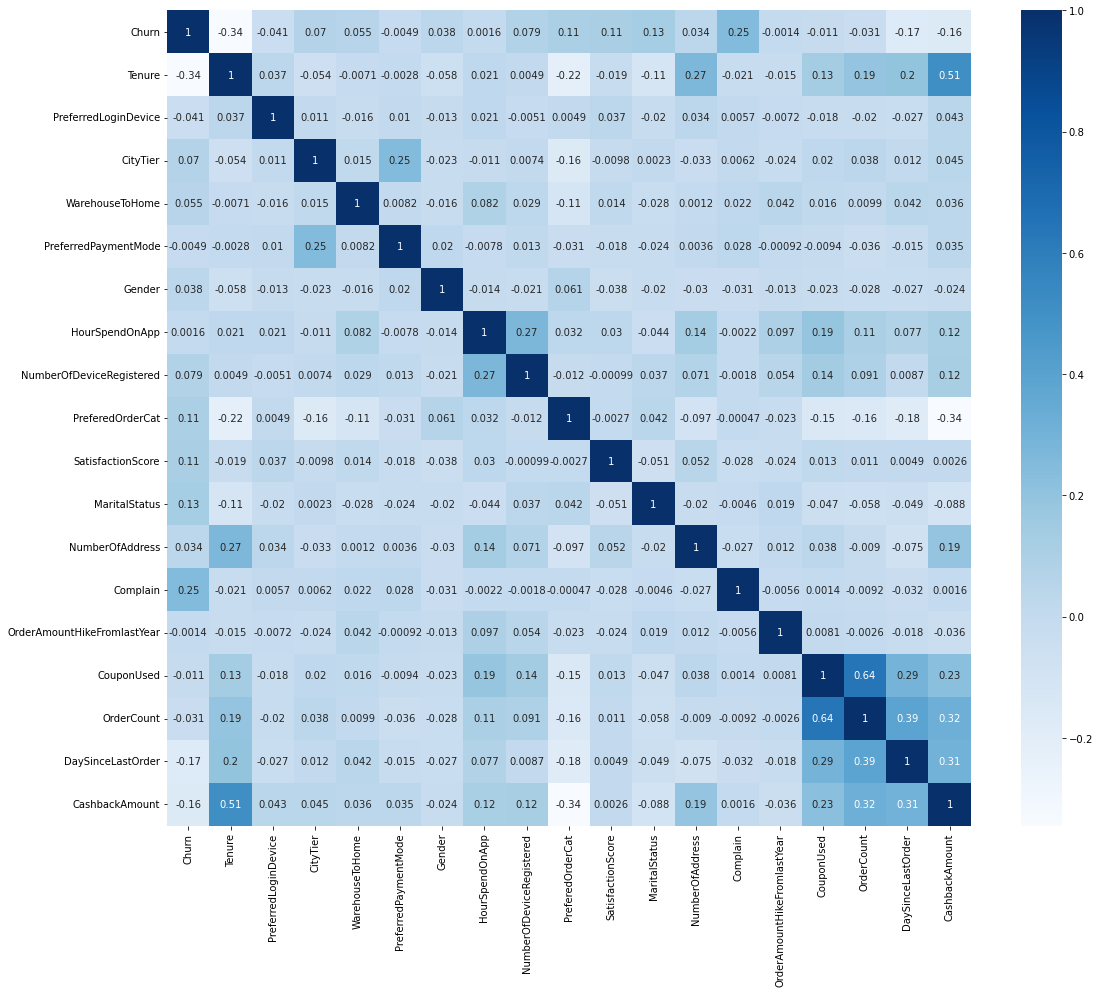

In [47]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [48]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252183
MaritalStatus                  0.132019
SatisfactionScore              0.108536
PreferedOrderCat               0.105073
NumberOfDeviceRegistered       0.079158
CityTier                       0.069710
WarehouseToHome                0.054803
Gender                         0.038218
NumberOfAddress                0.033847
HourSpendOnApp                 0.001628
OrderAmountHikeFromlastYear   -0.001410
PreferredPaymentMode          -0.004939
CouponUsed                    -0.010879
OrderCount                    -0.031473
PreferredLoginDevice          -0.040957
CashbackAmount                -0.164738
DaySinceLastOrder             -0.170018
Tenure                        -0.344897
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

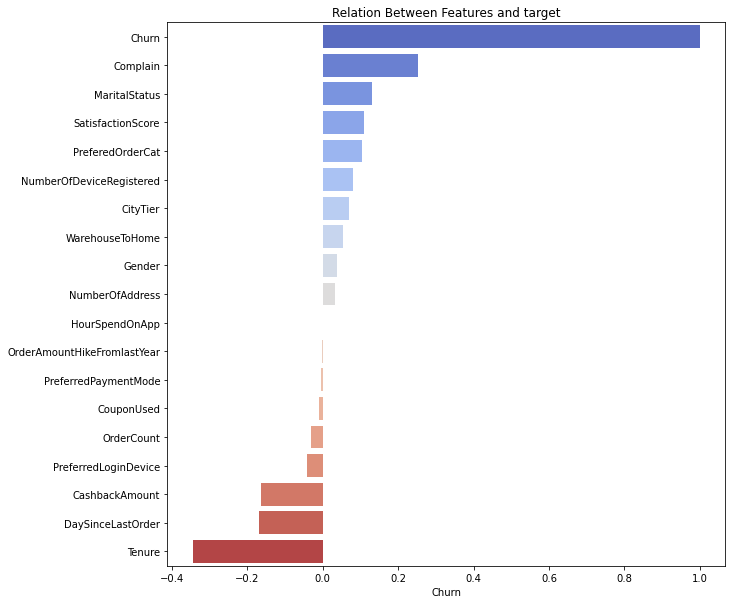

In [49]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [50]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [51]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [52]:
from imblearn.combine import SMOTETomek

In [53]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [54]:
x_over.shape, y_over.shape

((8586, 18), (8586,))

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_over , y_over , test_size = 0.3 , random_state = 42)

x_val, x_test, y_val, y_test = train_test_split(x_test , y_test , test_size = 0.5 , random_state = 42)

In [56]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(6010, 18)
(1288, 18)
(1288, 18)


In [57]:
from sklearn.preprocessing import MinMaxScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_val_scaled = MN.transform(x_val)
x_test_scaled = MN.fit_transform(x_test)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [59]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7798668885191348
Test Score: 0.7981366459627329
Acc Train: 0.7798668885191348
Acc Test: 0.7981366459627329
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9074875207986689
Test Score: 0.8827639751552795
Acc Train: 0.9074875207986689
Acc Test: 0.8827639751552795
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9091614906832298
Acc Train: 1.0
Acc Test: 0.9091614906832298
                                                            
************************************************************
                                                            
Using m

In [60]:
!pip install mlxtend

In [61]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.7981366459627329
ROC Area under Curve = 0.7980517679964314
              precision    recall  f1-score   support

           0    0.83421   0.74339   0.78618       643
           1    0.76923   0.85271   0.80882       645

    accuracy                        0.79814      1288
   macro avg    0.80172   0.79805   0.79750      1288
weighted avg    0.80167   0.79814   0.79752      1288

**********************************************************************


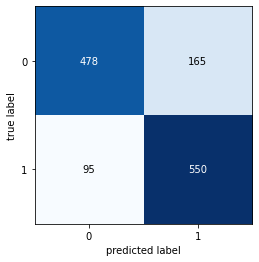

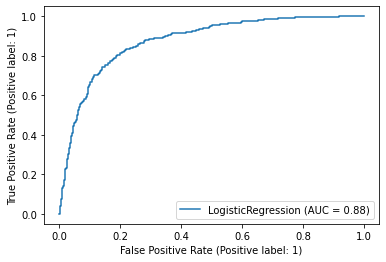

In [62]:
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8827639751552795
ROC Area under Curve = 0.8826901515425511
              precision    recall  f1-score   support

           0    0.92268   0.83515   0.87673       643
           1    0.84986   0.93023   0.88823       645

    accuracy                        0.88276      1288
   macro avg    0.88627   0.88269   0.88248      1288
weighted avg    0.88621   0.88276   0.88249      1288



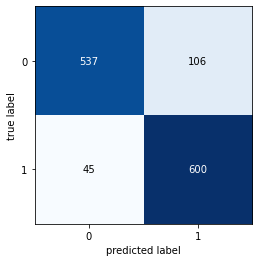

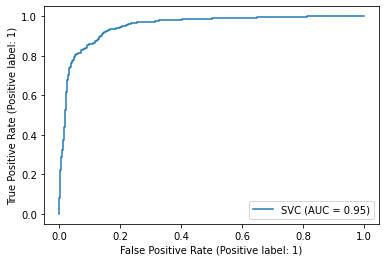

In [63]:
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9177018633540373
ROC Area under Curve = 0.9176847866710068
              precision    recall  f1-score   support

           0    0.92687   0.90669   0.91667       643
           1    0.90895   0.92868   0.91871       645

    accuracy                        0.91770      1288
   macro avg    0.91791   0.91768   0.91769      1288
weighted avg    0.91790   0.91770   0.91769      1288



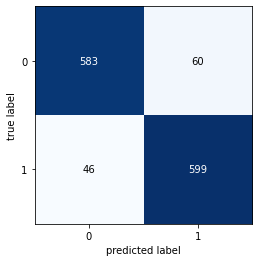

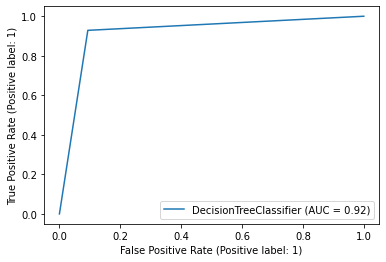

In [64]:
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

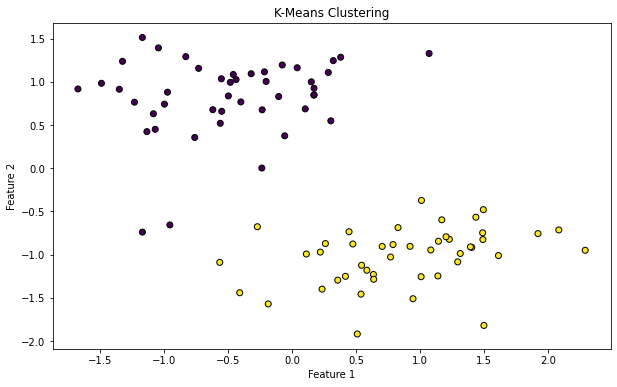

Silhouette Score: 0.6234384547036967


In [65]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Generating a synthetic dataset for demonstration
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# Splitting the dataset into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Visualizing K-Means Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

silhouette_avg = silhouette_score(X_test_scaled, y_pred_kmeans)
print("Silhouette Score:", silhouette_avg)


Training time: 0.830 seconds
Average prediction time per customer: 0.000019 seconds
Accuracy = 0.9759316770186336
ROC Area under Curve = 0.9759014792578394
              precision    recall  f1-score   support

           0    0.99515   0.95645   0.97542       643
           1    0.95821   0.99535   0.97643       645

    accuracy                        0.97593      1288
   macro avg    0.97668   0.97590   0.97592      1288
weighted avg    0.97665   0.97593   0.97592      1288



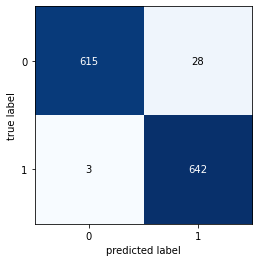

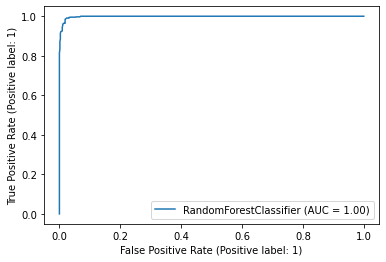

In [66]:
start=time.time()

model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)

end=time.time()
training_time=end-start
print(f'Training time: {training_time:.3f} seconds')

pred_start=time.time()
y_pred = model.predict(x_test_scaled)
pred_end = time.time()
pred_time = (pred_end-pred_start)/len(x_test_scaled)
print(f'Average prediction time per customer: {pred_time:.6f} seconds')  
                                   
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8392857142857143
ROC Area under Curve = 0.8391635622747056
              precision    recall  f1-score   support

           0    0.90221   0.76050   0.82532       643
           1    0.79357   0.91783   0.85119       645

    accuracy                        0.83929      1288
   macro avg    0.84789   0.83916   0.83825      1288
weighted avg    0.84781   0.83929   0.83827      1288



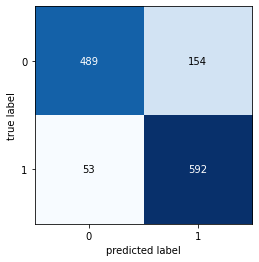

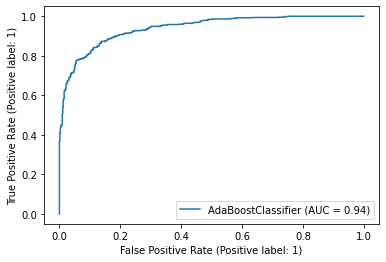

In [67]:
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

In [68]:
end_all=time.time()
full_time=end_all-start_all
print(f'Time of project: {full_time:.3f} seconds')

Time of project: 91.346 seconds


In [69]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

Train_Accuarcy  Test_Accuarcy
Logistic Regression           0.779867       0.798137
Support Vector Machine        0.907488       0.882764
Decision Tree                 1.000000       0.909161
Random Forest                 1.000000       0.979814
AdaBoostClassifier            0.870383       0.839286

In [70]:
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()


fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()